This dataset contains a comprehensive list of the most famous songs of 2023 as listed on Spotify. The dataset offers a wealth of features beyond what is typically available in similar datasets. It provides insights into each song's attributes, popularity, and presence on various music platforms. The dataset includes information such as track name, artist(s) name, release date, Spotify playlists and charts, streaming statistics, Apple Music presence, Deezer presence, Shazam charts, and various audio features.

**Key Features:**
- track_name: Name of the song
- artist(s)_name: Name of the artist(s) of the song
- artist_count: Number of artists contributing to the song
- released_year: Year when the song was released
- released_month: Month when the song was released
- released_day: Day of the month when the song was released
- in_spotify_playlists: Number of Spotify playlists the song is included in
- in_spotify_charts: Presence and rank of the song on Spotify charts
- streams: Total number of streams on Spotify
- in_apple_playlists: Number of Apple Music playlists the song is included in
- in_apple_charts: Presence and rank of the song on Apple Music charts
- in_deezer_playlists: Number of Deezer playlists the song is included in
- in_deezer_charts: Presence and rank of the song on Deezer charts
- in_shazam_charts: Presence and rank of the song on Shazam charts
- bpm: Beats per minute, a measure of song tempo
- key: Key of the song
- mode: Mode of the song (major or minor)
- danceability_%: Percentage indicating how suitable the song is for dancing
- valence_%: Positivity of the song's musical content
- energy_%: Perceived energy level of the song
- acousticness_%: Amount of acoustic sound in the song
- instrumentalness_%: Amount of instrumental content in the song
- liveness_%: Presence of live performance elements
- speechiness_%: Amount of spoken words in the song

**Packages:** importing the most usefull packages to perform data exploration and visualization data

In [6]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

**Upload and first check at the data**

In [21]:
spotify_songs_df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
spotify_songs_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [22]:
spotify_songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [23]:
spotify_songs_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


In [25]:
spotify_songs_df.describe().T

,count,mean,std,min,25%,50%,75%,max
artist_count,953.0,1.556139,0.893044,1.0,1.0,1.0,2.0,8.0
released_year,953.0,2018.238195,11.116218,1930.0,2020.0,2022.0,2022.0,2023.0
released_month,953.0,6.033578,3.566435,1.0,3.0,6.0,9.0,12.0
released_day,953.0,13.930745,9.201949,1.0,6.0,13.0,22.0,31.0
in_spotify_playlists,953.0,5200.124869,7897.608990,31.0,875.0,2224.0,5542.0,52898.0
in_spotify_charts,953.0,12.009444,19.575992,0.0,0.0,3.0,16.0,147.0
in_apple_playlists,953.0,67.812172,86.441493,0.0,13.0,34.0,88.0,672.0
in_apple_charts,953.0,51.908709,50.630241,0.0,7.0,38.0,87.0,275.0
in_deezer_charts,953.0,2.666317,6.035599,0.0,0.0,0.0,2.0,58.0
bpm,953.0,122.540399,28.057802,65.0,100.0,121.0,140.0,206.0


In [26]:
spotify_songs_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


**Null values handling**

In [27]:
spotify_songs_df.dropna()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5


In [29]:
spotify_songs_df.isnull().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

I need to remove the null components of the in_shazam_charts and key columns

In [64]:
in_shazam_charts_mode = spotify_songs_df['in_shazam_charts'].mode()[0]
spotify_songs_df.fillna(in_shazam_charts_mode, inplace=True)
key_mode = spotify_songs_df['key'].mode()[0]
spotify_songs_df.fillna(key_mode, inplace=True)

In [65]:
spotify_songs_df.isnull().sum()

track_name              0
artist(s)_name          0
artist_count            0
released_year           0
released_month          0
released_day            0
in_spotify_playlists    0
in_spotify_charts       0
streams                 0
in_apple_playlists      0
in_apple_charts         0
in_deezer_playlists     0
in_deezer_charts        0
in_shazam_charts        0
bpm                     0
key                     0
mode                    0
danceability_%          0
valence_%               0
energy_%                0
acousticness_%          0
instrumentalness_%      0
liveness_%              0
speechiness_%           0
dtype: int64

I removed the null components by replacing them with the mode value

**Show some interesting plots**

Creo una nuova colonna combinando le colonne released_year, released_month e released_day in una singola colonna per vedere esattamente la data completa dell'uscita della canzone

In [84]:
spotify_songs_df['released_date'] = pd.to_datetime(spotify_songs_df['released_year'].astype(str) + '-' + spotify_songs_df['released_month'].astype(str) + '-' + spotify_songs_df['released_day'].astype(str))
spotify_songs_df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%,released_date
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,B,Major,80,89,83,31,0,8,4,2023-07-14
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,C#,Major,71,61,74,7,0,10,4,2023-03-23
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,F,Major,51,32,53,17,0,31,6,2023-06-30
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,A,Major,55,58,72,11,0,11,15,2019-08-23
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,A,Minor,65,23,80,14,63,11,6,2023-05-18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,A,Major,60,24,39,57,0,8,3,2022-11-03
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,F#,Major,42,7,24,83,1,12,6,2022-10-21
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,C#,Major,80,81,67,4,0,8,6,2022-11-03
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,C#,Major,82,67,77,8,0,12,5,2022-10-20


Grafico a dispersione per visualizzare la distribuzione delle date di uscita nel tempo

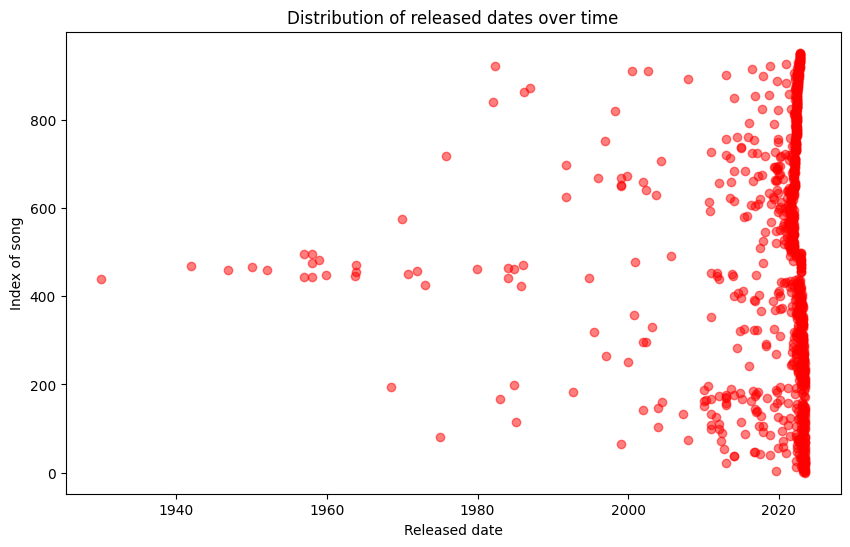

In [97]:
plt.figure(figsize=(10,6))
plt.scatter(spotify_songs_df['released_date'], spotify_songs_df.index, color='red', alpha=0.5)
plt.title('Distribution of released dates over time')
plt.xlabel('Released date')
plt.ylabel('Index of song')
plt.show()

alpha=0.5 imposta la trasparenza dei punti del grafico a dispersione su 0.5 per renderli leggermente trasparenti

possiamo osservare che la maggior parte delle canzoni sono state create negli ultimi anni

Grafico a barre per mostrare quante canzoni sono state rilasciate in ciascun anno

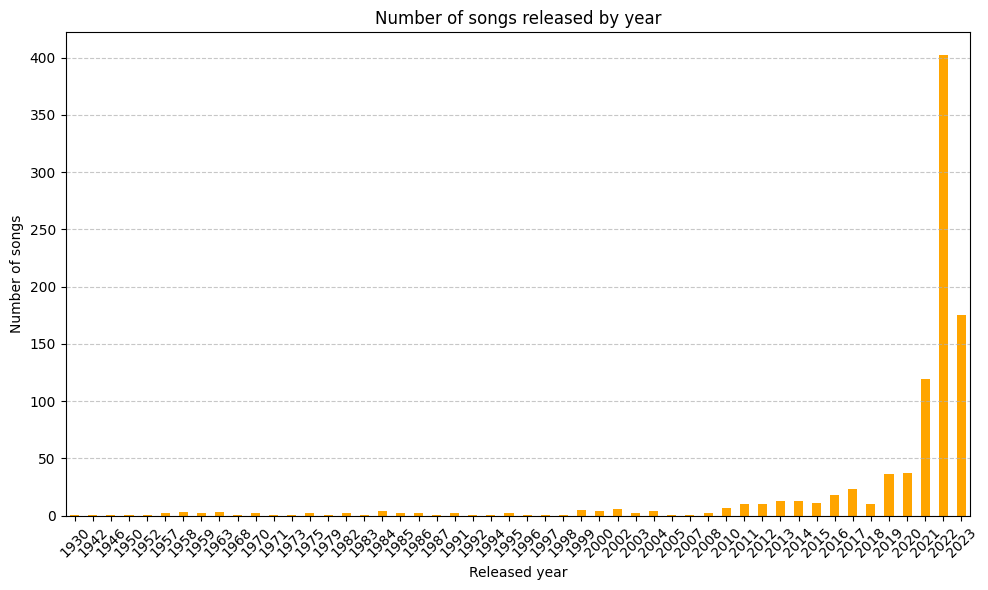

In [100]:
count_by_year = spotify_songs_df['released_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
count_by_year.plot(kind='bar', color='orange')
plt.title('Number of songs released by year')
plt.xlabel('Released year')
plt.ylabel('Number of songs')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7) #griglia solo su asse y, stile: riga tratteggiata, trasparenza: 70% (0 trasparente, 1 opaco)
plt.tight_layout() #regola automaticamente la posizione degli assi del grafico in modo che non si sovrappongano e che il contenuto sia distribuito uniformemente
plt.show()

Per visualizzare la distribuzione delle statistiche di streaming utilizzo un istogramma con la libreria matplotlib

In [139]:
streams = spotify_songs_df['streams'].value_counts()
streams

streams
723894473     2
156338624     2
1223481149    2
395591396     2
1695712020    1
             ..
1357608774    1
294352144     1
972164968     1
920045682     1
96007391      1
Name: count, Length: 949, dtype: int64

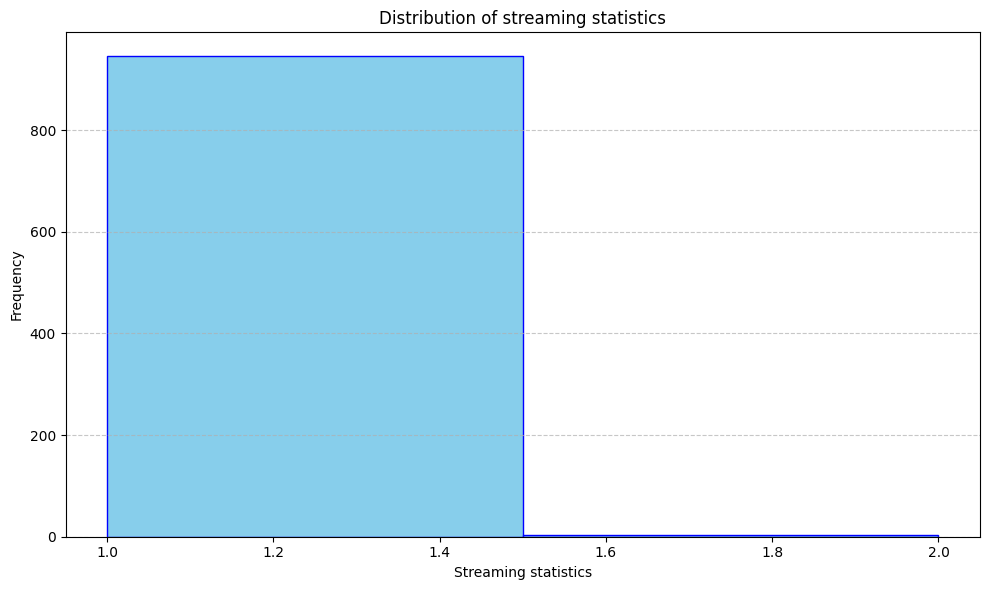

In [140]:
plt.figure(figsize=(10, 6))  # Imposta le dimensioni del grafico
plt.hist(streams, bins=2, color='skyblue', edgecolor='blue')  # Crea l'istogramma
plt.title('Distribution of streaming statistics')  # Imposta il titolo del grafico
plt.xlabel('Streaming statistics')  # Etichetta dell'asse x
plt.ylabel('Frequency')  # Etichetta dell'asse y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Abilita la griglia sull'asse y
plt.tight_layout()  # Ottimizza la disposizione degli assi
plt.show()  # Mostra il grafico

Grafico che mostra il conteggio dei valori unici nella colonna delle statistiche di streaming: value_counts() per contare il numero di occorrenze di ciasun valore nella colonna.

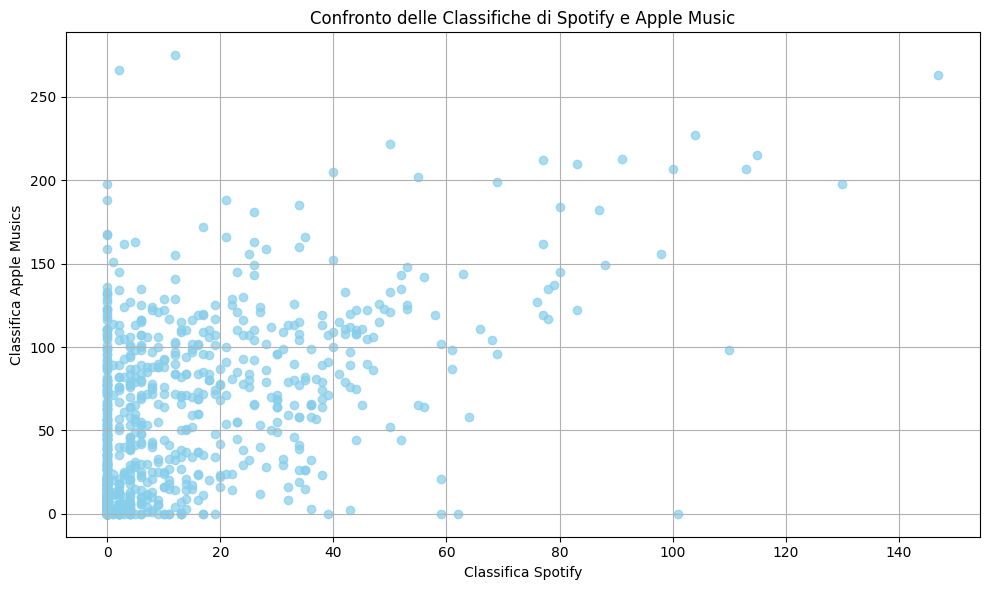

In [157]:
# Grafico a dispersione
plt.figure(figsize=(10, 6))
plt.scatter(spotify_songs_df['in_spotify_charts'], spotify_songs_df['in_apple_charts'], color='skyblue', alpha=0.7)
plt.title('Confronto delle Classifiche di Spotify e Apple Music')
plt.xlabel('Classifica Spotify')
plt.ylabel('Classifica Apple Musics')
plt.grid(True)
plt.tight_layout()
plt.show()